
- Correlation
- Linear regression

# Overview of A3

# Importing packages

In [1]:
import seaborn as sns
import scipy.stats as stats
import scipy.signal as signal
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import statsmodels.graphics.api as sga
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_color_codes()

Importing DATA
We going to use the same Airbnb data:

In [2]:
data = pd.read_csv('~/Documents/bioa/data/Athens/listings.csv', index_col='id')
data1 = pd.read_csv(
    '~/Documents/bioa/data/Athens/listings_details.csv', index_col='id')
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value",
                  "review_scores_cleanliness", "review_scores_location",
                  "review_scores_accuracy", "review_scores_communication",
                  "review_scores_checkin", "review_scores_rating", "maximum_nights",
                  "listing_url", "host_is_superhost", "host_about", "host_response_time",
                  "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
data = pd.merge(data, data1[target_columns], on='id', how='left')
data['weekly_price'] = data.weekly_price.str.replace(",", "")
data['weekly_price'] = pd.to_numeric(data['weekly_price'].str.strip("$"))

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Concurrent, Coupled, and Correlated Processes

- The human body is a complex integration of a number o biological systems
- Biological processes ar not independent of one another.
They are bound together by physical or physiological control and communication.
- Analyzing any single process without coupled ones may provide only partial information.

## Examples:
### Electroencephalography (EEG) and Electrooculography (EOG)

![EEGEOG](../images/EOGEEG.jpg)

### Cardiac Activity (ECG) and Phonocardiogram PCG waveforms

![PCG](../images/Wiggers_Diagram.png)

### Cardiac Activity (ECG) and Respiration (RSP)

![ECG_Resp](../images/KvepavimasIrKardio.png)

### Sleep analysis

![Poly](../images/MiegoPolyCorr.png)

## Visualization of variable relationships


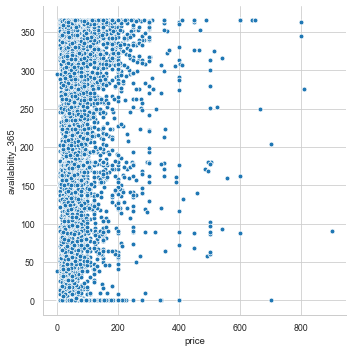

In [3]:
g = sns.relplot(x="price", y="availability_365",
                data=data[data["price"] < 1000])

g can be used to control grid

seaborn allows for easier control of markers, colors, sizes.

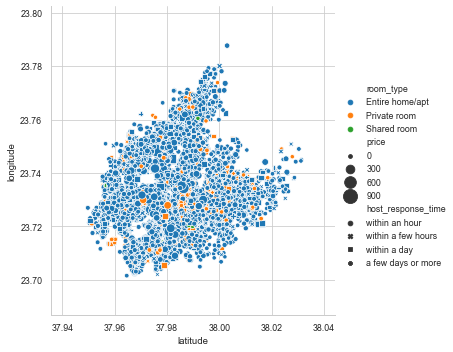

In [4]:
sns.relplot(x="latitude", y="longitude", hue="room_type", size='price',
            style='host_response_time', sizes=(15, 200), data=data[data['price'] < 1000]);

Combining data histograms and scatter plot with `jointplot`

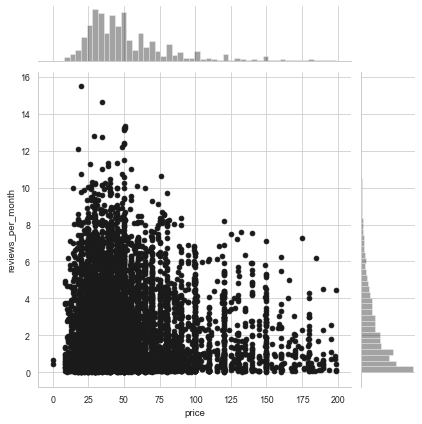

In [5]:
sns.jointplot(x="price", y="reviews_per_month",
              data=data[data['price'] < 200], color='k');

Hexbin visualizes density of data.
It enhances visibility at the dense areas.
But we loose outliers.

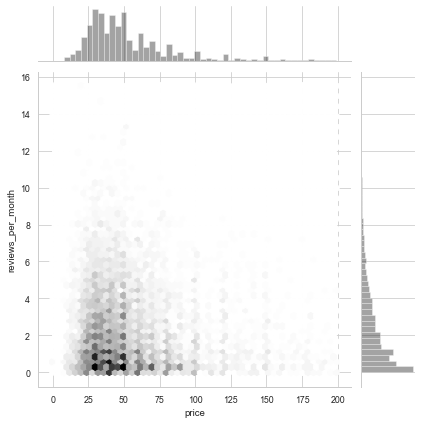

In [6]:
sns.jointplot(x="price", y="reviews_per_month", kind='hex',
              data=data[data['price'] < 200], color='k');

To get kernel density estimation add `kde` option

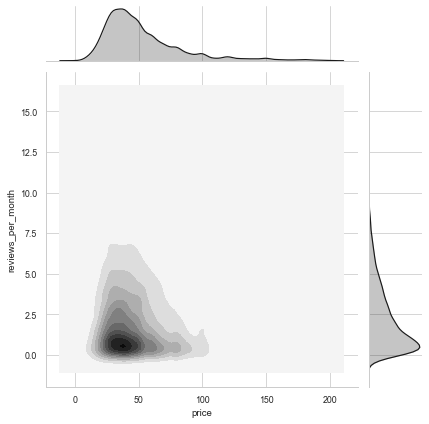

In [7]:
sns.jointplot(x="price", y="reviews_per_month", kind='kde',
              data=data[data['price'] < 200], color='k');

Rugplots is another way to represent data distribution

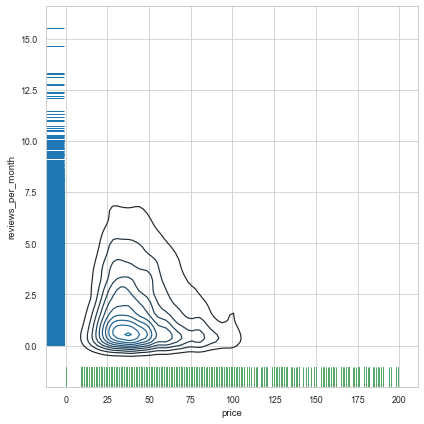

In [8]:
data1 = data[data['price'] < 200]
data1 = data1[data1['reviews_per_month'].notnull()]
f = plt.figure(figsize=(6, 6))
ax = plt.axes()
sns.kdeplot(data1.price, data1.reviews_per_month,
            ax=ax)
sns.rugplot(data1.price, color="g", ax=ax)
sns.rugplot(data1.reviews_per_month, vertical=True, ax=ax)
ax.set(ylim=(-2, None))
f.tight_layout();

## We can represent the relationship with the average

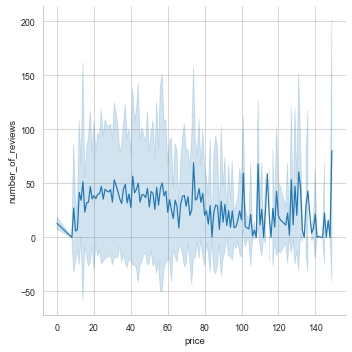

In [9]:
sns.relplot(x="price", y="number_of_reviews", kind="line",
            ci='sd', data=data[data['price'] < 150])
plt.tight_layout()

ci option adds standard deviation (sd) or confidence intervals (default) to the graph.
 They can be turned off with ci=None setting.

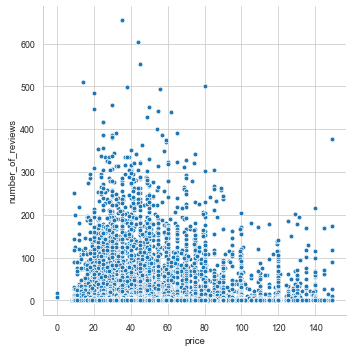

In [10]:
sns.relplot(x="price", y="number_of_reviews", data=data[data['price'] < 150])
plt.tight_layout();

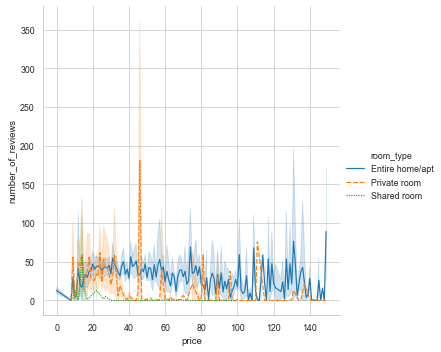

In [11]:
sns.relplot(x="price", y="number_of_reviews", kind="line", hue="room_type",
            style="room_type", data=data[data['price'] < 150]);

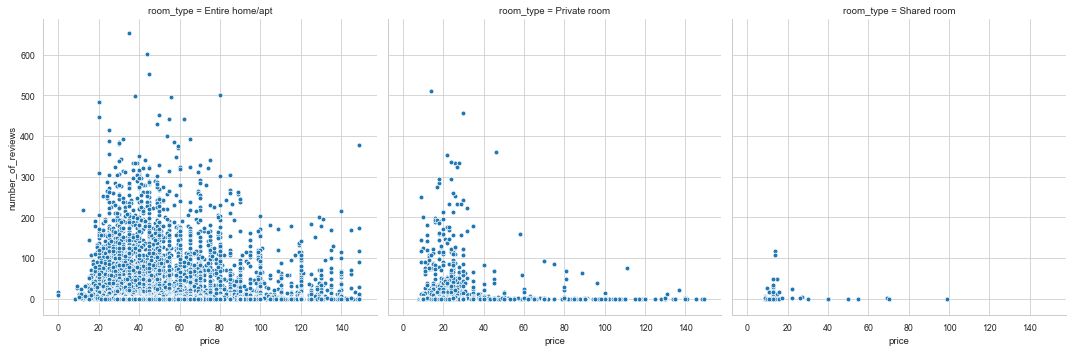

In [12]:
sns.relplot(x="price", y="number_of_reviews", col="room_type",
            data=data[data['price'] < 150]);

## Categorical variables

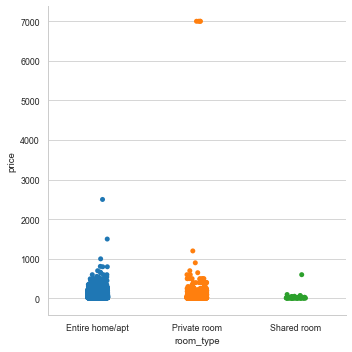

In [13]:
g = sns.catplot(x="room_type", y="price", data=data);

Log scale for visualization --- bigger values do not seem so far away

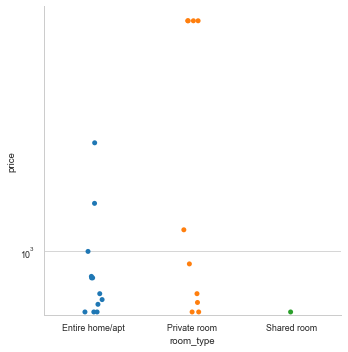

In [14]:
g = sns.catplot(x="room_type", y="price", data=data)
g.set(yscale="log");

Simple scatterplot behaves like catplot without added jitter.
It is harder to see the amount of data because of overlap.

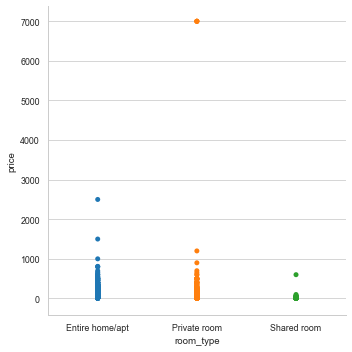

In [15]:
sns.catplot(x="room_type", y="price", jitter=False, data=data);

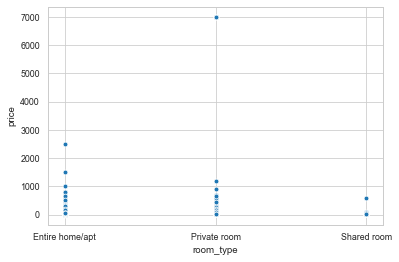

In [16]:
sns.scatterplot(x="room_type", y="price", data=data);

## Boxplot

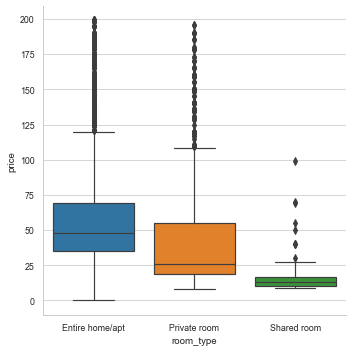

In [17]:
sns.catplot(x="room_type", y="price", kind="box",
            data=data[data["price"] < 200]);

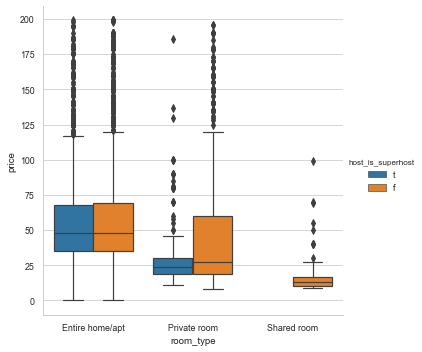

In [18]:
sns.catplot(x="room_type", y="price", kind="box", hue='host_is_superhost',
            data=data[data["price"] < 200]);

## Violin plots

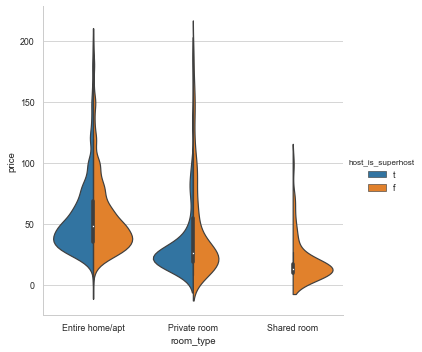

In [19]:
sns.catplot(x="room_type", y="price", kind="violin", hue='host_is_superhost',
            split=True, data=data[data["price"] < 200]);

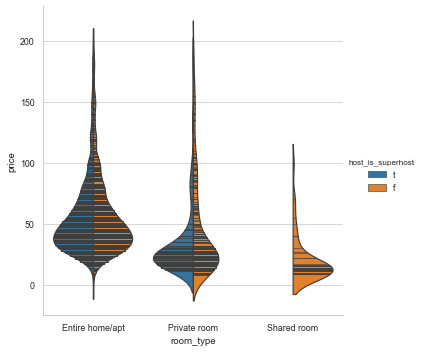

In [20]:
sns.catplot(x="room_type", y="price", kind="violin", hue='host_is_superhost', split=True,
            inner='stick', data=data[data["price"] < 200]);

Statistical packages quite often represents data with point graph.
Connecting points enhances visualization of trends.

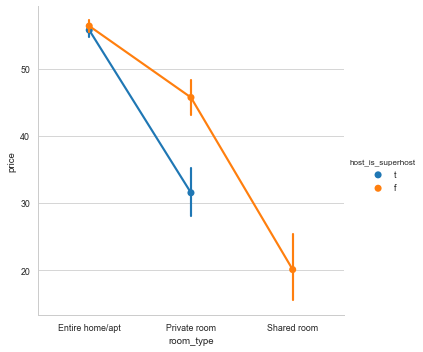

In [21]:
sns.catplot(x="room_type", y="price", kind="point", hue='host_is_superhost',
            data=data[data["price"] < 200]);

Histogram

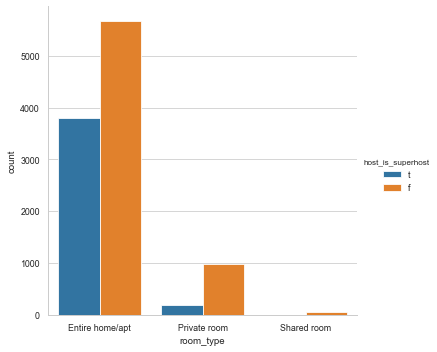

In [22]:
sns.catplot(x="room_type", kind="count", hue='host_is_superhost',
            data=data[data["price"] < 200]);

Pair-plot is a powerful exploratory visualization at the start of the analysis
Be careful to not include too many variables.

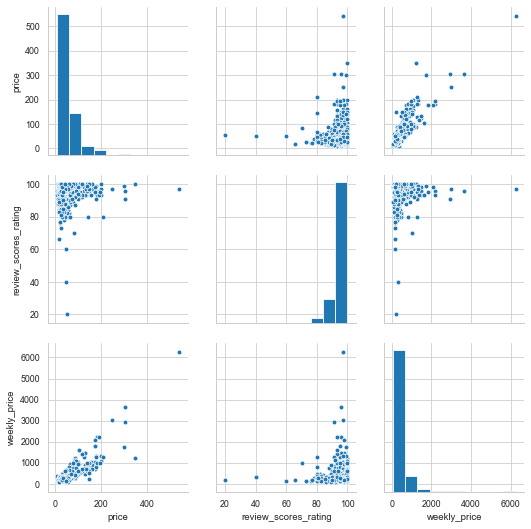

In [23]:
target_columns = ["price", "review_scores_rating",  "weekly_price"]
data = data[target_columns]
data2 = data.dropna()
sns.pairplot(data2);

# Correlation

Quantifies how much one variable is like another.

$$r_{xy} = \frac{1}{N}\sum^N_{n=1}x_ny_n$$

The problem with this transformation is that variables are of different dimensions and scales.
We need to transform  them if we want to make comparisons.

- We can standardise measures before calculation --- Pearson correlation
- Transform measures to their rank (order by size in the dataset) --- Spearman correlation

## Dot product

Dot product is at the core of many calculations:

![Dot](../images/dotProductVectors.png)

![Dot2](../images/dot_product_components.png)

In [24]:
np.dot(3, 2)

6

In [25]:
3*2

6

In [26]:
np.dot([3, 1, 2], [1, 2, 4])

13

In [27]:
3*1+2*1+4*2

13

Covariation -  measures two variables variation together
Covariation is an extra step in correlation as we normalize data by subtracting the mean

In [28]:
x = [3, 1, 2]
y = [1, 2, 4]

In [29]:
cov = np.dot(x - np.mean(x), y - np.mean(y)) / (len(x) - 1)
cov

-0.5

In [30]:
pd.Series(x).cov(pd.Series(y))

-0.5

# Pearson correlation
 $r_{xy}=\frac{1}{(N-1)\sigma_x \sigma_y}\sum^N_{n=1}(x_n-\bar{x})(y_n-\bar{y})$

- Standardized. Dividing by standard deviations
- In the range from -1 to +1. Marking strength and direction of correlation.

![correlation](../images/Corr.png)

![correlation strength](../images/CorelationStrength.jpg)

In [31]:
np.dot(x - np.mean(x), y - np.mean(y)) / ((len(x)-1) * np.sqrt(np.var(x, ddof=1) * np.var(y, ddof=1)))

-0.3273268353539886

In [32]:
stats.pearsonr(x, y)

(-0.3273268353539885, 0.7877043849903435)

In [33]:
pd.Series(x).corr(pd.Series(y), method='pearson')

-0.32732683535398854

In [34]:
np.corrcoef(x, y)

array([[ 1.        , -0.32732684],
       [-0.32732684,  1.        ]])

![correlation](../images/CorrelationWiki.png)

Lets load anscombe dataset. All datasets have very similar numbers and highlight the problems.

In [35]:
df = sns.load_dataset('anscombe')
dataI = df.query("dataset == 'I'")
dataII = df.query("dataset == 'II'")
dataIII = df[df['dataset'] == 'III']
dataIV = df[df['dataset'] == 'IV']
df.groupby('dataset').mean() 

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


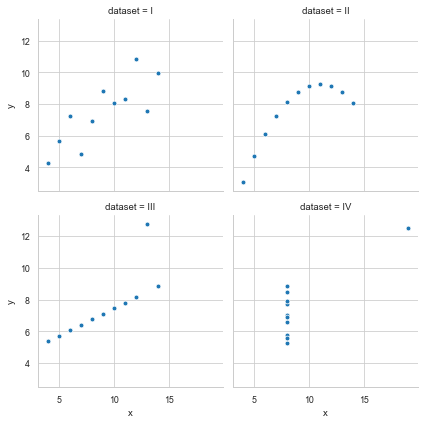

In [36]:
sns.relplot(x="x", y="y", col="dataset", data=df, col_wrap=2, height=3);

In [37]:
stats.pearsonr(dataI['x'], dataI['y'])

(0.8164205163448399, 0.0021696288730787927)

In [38]:
stats.pearsonr(dataII['x'], dataII['y'])

(0.8162365060002427, 0.0021788162369108027)

In [39]:
stats.pearsonr(dataIII['x'], dataIII['y'])

(0.8162867394895982, 0.002176305279228025)

In [40]:
stats.pearsonr(dataIV['x'], dataIV['y'])

(0.8165214368885029, 0.002164602347197218)

## Spearman correlation

If the relationship is not linear Pearson correlation can not identify it

Spearman correlation is also more robust to outliers

In python we can do spearman correlatino with:

In [41]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.5, pvalue=0.6666666666666667)

In [42]:
pd.Series(x).corr(pd.Series(y), method='spearman')

-0.5

In [43]:
pd.DataFrame(x).corrwith(pd.DataFrame(y), method='spearman')

0   -0.5
dtype: float64

Spearman correlation is different for all four datasets

In [44]:
stats.spearmanr(dataI['x'], dataI['y'])

SpearmanrResult(correlation=0.8181818181818182, pvalue=0.0020831448404786904)

In [45]:
stats.spearmanr(dataII['x'], dataII['y'])

SpearmanrResult(correlation=0.690909090909091, pvalue=0.018565033381595004)

In [46]:
stats.spearmanr(dataIII['x'], dataIII['y'])

SpearmanrResult(correlation=0.990909090909091, pvalue=3.762571807085399e-09)

In [47]:
stats.spearmanr(dataIV['x'], dataIV['y'])

SpearmanrResult(correlation=0.5, pvalue=0.11730680301423815)

## Time shift problem
While visually we can see that the difference there is only time shift correlation is 0 between both signals.

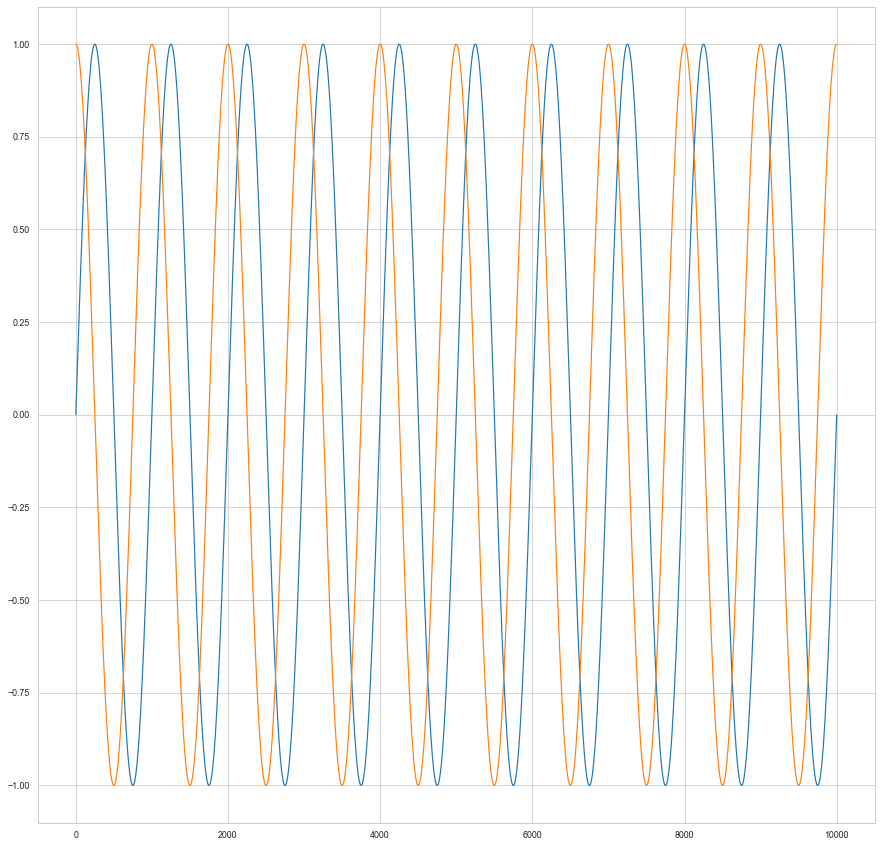

In [48]:
plt.figure(figsize=(15,15))
t = np.linspace(0, 10000, 10000)
sinA = np.sin(2*np.pi*10*t)
cosA = np.cos(2*np.pi*10*t)
plt.plot(t, sinA)
plt.plot(t, cosA);

In [49]:
stats.pearsonr(sinA, cosA)

(3.366862406311655e-13, 0.9999999999787347)

In [50]:
stats.spearmanr(sinA, cosA)

SpearmanrResult(correlation=0.00014453334744576708, pvalue=0.988469750233205)

### Cross-correlation

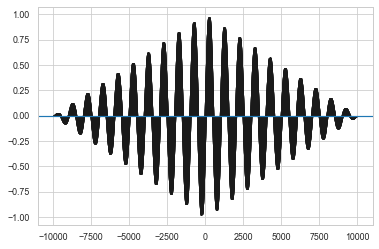

In [51]:
plt.xcorr(sinA, cosA, maxlags=None, normed=True);

In [52]:
correls = np.correlate(sinA, cosA, 'full')

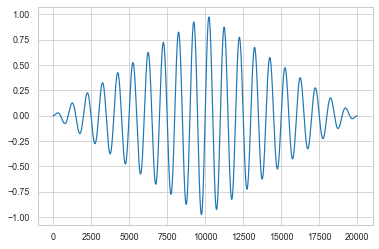

In [53]:
correls = signal.correlate(sinA, cosA, 'full')
correls /= np.sqrt(np.dot(sinA, sinA) * np.dot(cosA, cosA))
plt.plot(correls);

# Regression

Main goal --- describe relationship between dependent (y, measured output) and independent (x, input) variables.
- Evaluates relationship
- Describes tendencies
- Predicts new values


## Linear regression

- $y=\beta_0+\beta_1x_1+\ldots+\beta_rx_r+\varepsilon$
- $\beta_r$ --- coefficients
- $\varepsilon$ --- random error
- $y_i-f(x_i)$ --- residuals

We try to find $\beta$ that minimises residuals.
 Ordinary least squares fit is the most common method:
 $$LS = \sum_i(y_i-f(x_i))^2$$

![Regression](../images/Regresija1.png)

In [54]:
df = sns.load_dataset('anscombe')
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [55]:
dataI.shape

(11, 3)

We can calculate and plot regression with seaborn pacage with these functions:

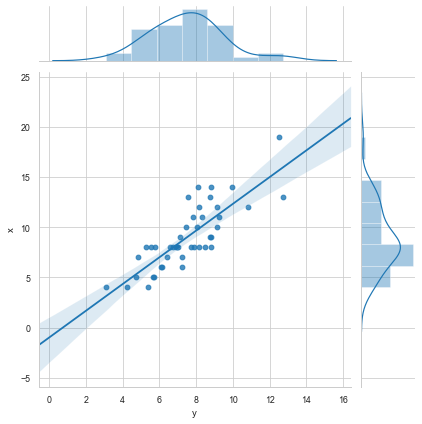

In [56]:
sns.jointplot(y="x", x="y", data=df, kind="reg");

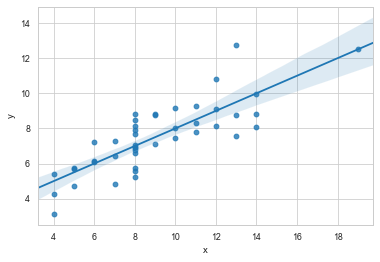

In [57]:
sns.regplot(x='x', y='y', data=df);

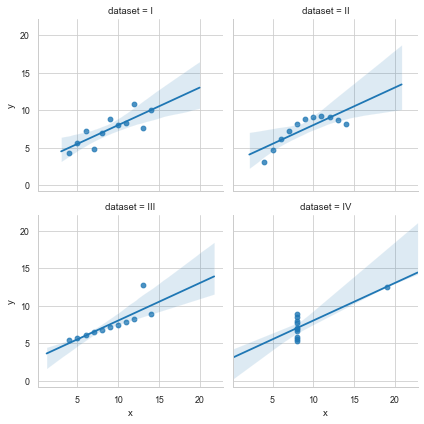

In [58]:
sns.lmplot(x="x", y="y", col="dataset", data=df, col_wrap=2, height=3);

### Regression analysis steps:
- Import packages
- Create model
- Perform model diagnostics and correction:
  + Is pattern in data linear? (scatterplot)
  + Check for outliers.
  + Residuals dispersion. Is standard deviation constant?
  + Normality of data. (histogram)
  + Independence of observations. Autocorrelation within variables. Multiple observations of the same.
  + Autocorrelation.
- Model description and prediction of new variables

#### Ways to perform simple regression with python:
- Statmodels:
  - first we define the relationships
  - and then we fit the data

In [59]:
formula = 'y ~ x'
resultsI = smf.ols(formula, data=dataI).fit()
resultsI.summary()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 22 May 2020   Prob (F-statistic):            0.00217
Time:                        14:35:01   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most important outpus of regression analysis:
- $R^2$ --- the amount of information the model explains. [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient\_of\_determination)
- $R^2 = 1 - Var(res)/Var(y)$
- $R^2=\rho^2$ Pearson correlation is equal to simple linear regression
- Adjusted $\bar{R}^2=1-(1-R^2)\frac{n-1}{n-k-1}$ corrects increase of R with increase of independent variables. When the number of observations is very large compared to the number of predictors, the value of R-square and adjusted R-square will be much closer because the ratio of (N – 1)/(N – k – 1) will approach 1.


- Left side top, general info about the model:
    - Dep. Variable --- dependent variable, output
    - Model --- model used
    - Method --- how parameters in the model were calculated
    - No. Observations --- the amount of variables
    - DF Residuals --- degree of freedom. N - intercept - param
- Right side top, model goodness of fit:
    - R-squared --- coefficient of determination (goal more then 0.2)
    - Adj. R-squared --- determination coefficient fixed
    - F-statistic --- how good is the  fit. (H0 all coefficients are 0)
    - Prob (F-statistic) p<0.05
    - Log-likelihood. Used to compare models, more is better
    - AIC (The Akaike Information Criterion). Addition to Log-likelihood
    - BIC (The Bayesian Information Criterion). Addition to Log-likelihood
- Coeficients:
    - coef --- values of coeficients in the equation
    - ... stats
- Information on residuals:
    - Omnibus D'Angostin test. Normality check (goal 0)
    - Prob (Omnibus). (Goal 1)
    - Jarque-Bera. Alternative to Omnibus
    - Durbin-Watson --- autocorelation test. 2 - no autocorrelation, 0-2 positive corr, 2-4 negative corr. Important with time dimension
    - Cond. No --- correlation between parameters. Goal <30. Important when more then 1 param.
    - Skewness --- symetry parameter. (-0.5 0.5) symetric, (-1 1) minimal distortion, 1+ big distortion
    - Kurtosis --- shape of distribution. 0 Gaussian, <0 goes to uniform, >0 sharp peak

[More information](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html)

In [60]:
resultsI.rsquared

0.666542459508775

In [61]:
resultsI.f_pvalue

0.002169628873078794

In [62]:
resultsI.pvalues.x

0.002169628873078794

In [63]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = ssa.jarque_bera(resultsI.resid)
list(zip(name, test))

[('Jarque-Bera', 0.2894334782733335),
 ('Chi^2 two-tail prob.', 0.8652673547788416),
 ('Skew', -0.12215570480195066),
 ('Kurtosis', 2.243823327217117)]

In [64]:
dir(resultsI)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


To plot linear regression line from statsmodels we can either plot fitted values

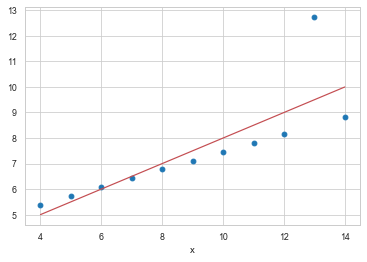

In [65]:
resultsIII = smf.ols(formula='y~x', data=df.query("dataset == 'III'")).fit()
plt.plot(dataIII.x, dataIII.y, 'o')
sns.lineplot(dataIII.x, resultsIII.fittedvalues, color='r');

Or evaluate linear regression equation $y = intercept + beta1*x$

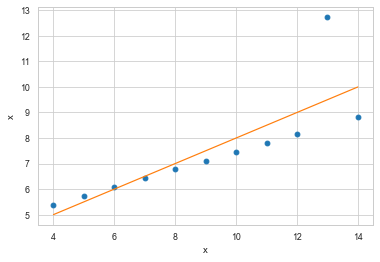

In [66]:
plt.plot(dataIII.x, dataIII.y, 'o')
sns.lineplot(dataIII.x, resultsIII.params[0] + resultsIII.params[1] * dataIII.x);

In [67]:
formula = 'y ~ x'
resultsII = smf.ols(formula, data=dataII).fit()
resultsII.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 22 May 2020   Prob (F-statistic):            0.00218
Time:                        14:38:34   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
formula = 'y ~ x'
resultsIV = smf.ols(formula, data=dataIV).fit()
resultsIV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 22 May 2020   Prob (F-statistic):            0.00216
Time:                        14:38:40   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 We can also do linear regression with:

- numpy

In [69]:
np.polyfit(dataI.x, dataI.y, deg=1)

array([0.50009091, 3.00009091])

- scipy

In [70]:
stats.linregress(dataI.x, dataI.y)

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

dataII looks nonlinear, we can model it with order 2 polynomial

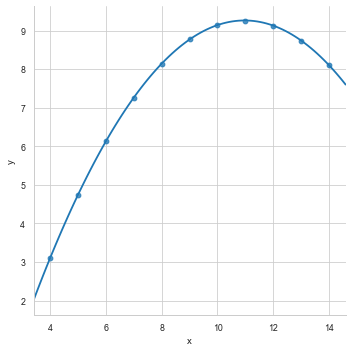

In [71]:
sns.lmplot(x="x", y="y", data=dataII, order=2);

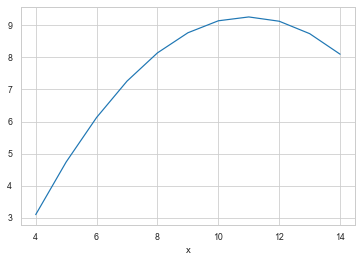

In [72]:
dataII['x2'] = dataII['x'] ** 2
formula = 'y~ x2 + x'
results = smf.ols(formula, data=dataII).fit()

sns.lineplot(dataII.x, results.fittedvalues);

numpy polyfit

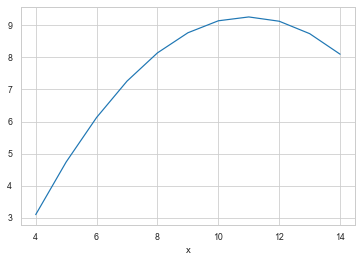

In [73]:
weights = np.polyfit(dataII.x, dataII.y, 2)
model = np.poly1d(weights)
# model[0]*x^2 + model[1]*x+model[2]
results = smf.ols(formula='y~model(dataII.x)', data=dataII).fit()
sns.lineplot(dataII.x, results.fittedvalues);

Second order results are harder to understand.
Bigger order might overfit the data --- model will look too much at the noise.

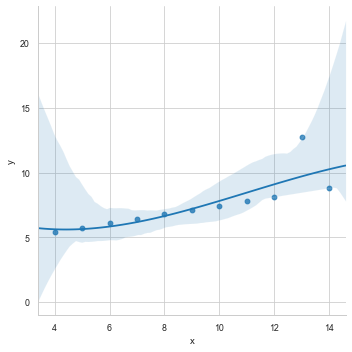

In [74]:
sns.lmplot(x="x", y="y", data=dataIII, order=3);

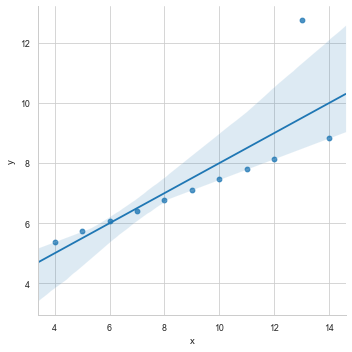

In [75]:
sns.lmplot(x="x", y="y", data=dataIII, order=1);

In the second and fourth dataset we can see outliers.
Outliers have big impact for regression coefficients.
Outliers might indicate nonlinear tendencies, but also they could be more extreme values in a linear system.

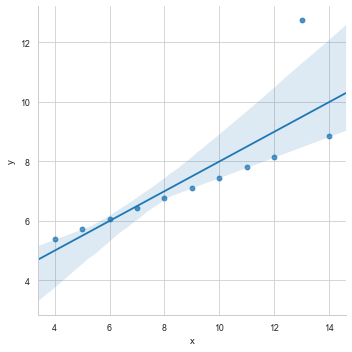

In [76]:
sns.lmplot(x="x", y="y", data=dataIII);

Sometimes (if we think that outlier is a product of some hardware noise or smilar) we can delete outliers.
Otherwise we can apply different type of analysis.
For example we can use robust linear regression, which ignores such outliers.
(seaborn `robust = True`)

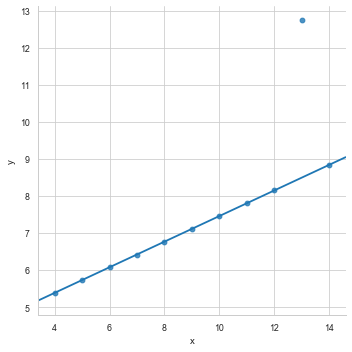

In [79]:
sns.lmplot(x="x", y="y", data=dataIII, robust=True, ci=None);

To separate outliers we can use influence plots (how far independent values are one from another).
In simple cases scatterplot is enough.

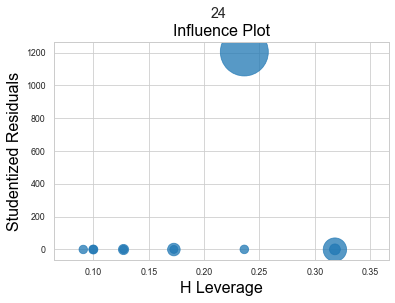

In [80]:
sga.influence_plot(resultsIII);

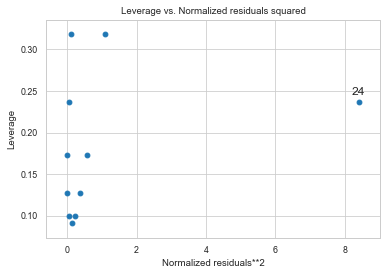

In [81]:
sga.plot_leverage_resid2(resultsIII);

In [82]:
dataIII

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [83]:
dataIII.loc[24, :]

dataset      III
x             13
y          12.74
Name: 24, dtype: object

If we have no outliers we can test residuals dispersion

Heteroscedasticity -- dispersion not equal. (homoscedasticity --- equal dispersion))

With unequal dispersion $\beta$ values can overfit and extra relationships can be discovered.

We can see it with residuals vs dependent variables plot;
Goal --- equal distribution.

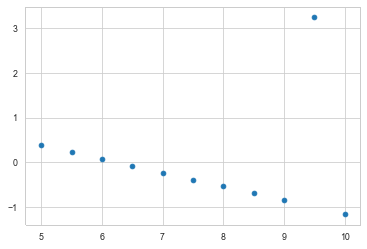

In [84]:
plt.scatter(resultsIII.fittedvalues, resultsIII.resid);

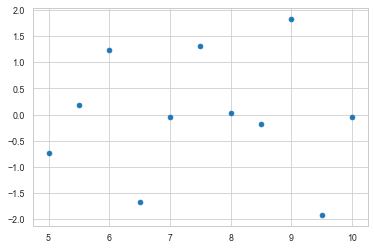

In [85]:
plt.scatter(resultsI.fittedvalues, resultsI.resid);

With seaborn we can get the same results:

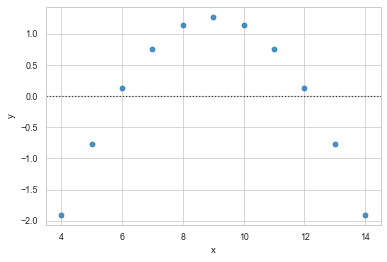

In [86]:
sns.residplot(x="x", y="y", data=dataII);

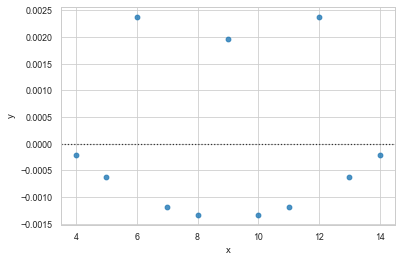

In [87]:
sns.residplot(x="x", y="y", data=dataII, order=2);

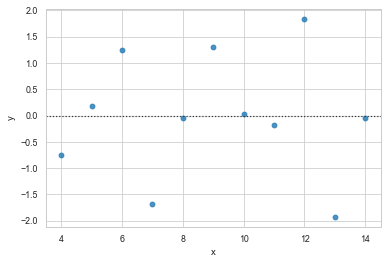

In [88]:
sns.residplot(x="x", y="y", data=dataI);

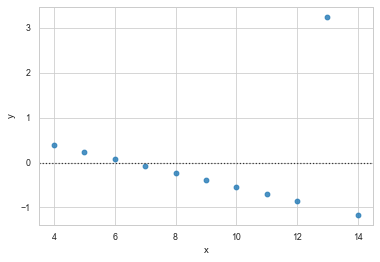

In [89]:
sns.residplot(x="x", y="y", data=dataIII);

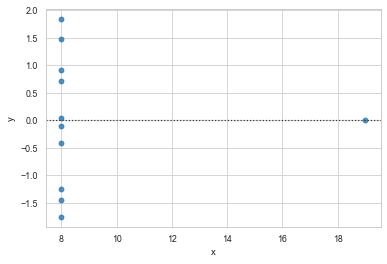

In [90]:
sns.residplot(x="x", y="y", data=dataIV);

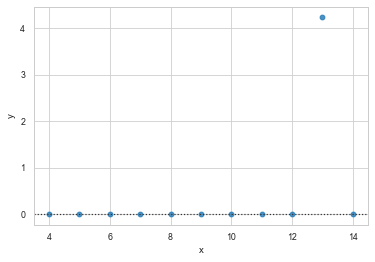

In [91]:
sns.residplot(x="x", y="y", data=dataIII, robust=True);

To confirm equal dispersion we can test with  Breusch-Pagan test.

In [92]:
name = ['Lagrange multiplier statistic', 'p-value']
test = ssa.het_breuschpagan(resultsI.resid, resultsI.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 0.6553075561484141),
 ('p-value', 0.41822145680189327)]

In [93]:
test = ssa.het_breuschpagan(resultsIII.resid, resultsIII.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 2.7234169729360658),
 ('p-value', 0.09888612104791304)]

Harvey-Collier multiplier test is used for linearity

In [94]:
ssa.linear_harvey_collier(resultsI)

Ttest_1sampResult(statistic=0.42926646145536435, pvalue=0.6806318987913449)

In [95]:
ssa.linear_harvey_collier(resultsII)

Ttest_1sampResult(statistic=-1.4102702678273762, pvalue=0.20131395495808926)

Next we test for independent variable correlation with other independent variables (multicollinearity)

In [ ]:
dataI['x3'] = dataI.loc[:, 'x'] * 3
results = smf.ols(formula='y ~ x + x3', data=dataI).fit()
results.summary()

Lets compare with previous results

In [96]:
resultsI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 22 May 2020   Prob (F-statistic):            0.00217
Time:                        14:42:41   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statsmodels warns about multicollinearity. Cond. No should be lower then 30 (if more then one independent variable.)
If we have a multicollinearity problem we can gather more data, slowly add variables looking for problematic ones or remove the mean

Residuals should have a mean of 0 and a Gaussian distribution.
Normality can be tested with Omnibus and JB (prob; good = 1).
Visually we can test with QQ graph (straight line is a goal).

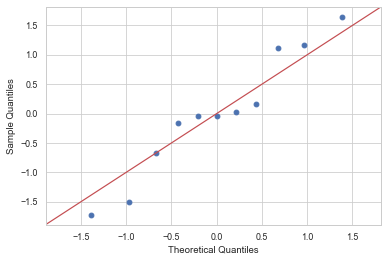

In [97]:
sga.qqplot(resultsI.resid, stats.norm, fit=True, line='45');

 QQ can be used to check with other distributions

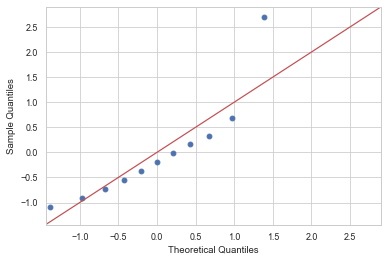

In [98]:
sga.qqplot(dataIII.y, stats.norm, fit=True, line='45');

Normality can be tested with -- Shapiro-Wilk  test (H0 - Gaussian)

In [99]:
stats.shapiro(dataI.y)  # normally distributed

(0.9769276976585388, 0.9466750621795654)

In [100]:
stats.shapiro(dataIII.y)  # p < 0.05

(0.833609938621521, 0.026038551703095436)

We can fix data distribution with logarithm transformation

In [101]:
stats.shapiro(np.log(dataIII.y))

(0.9246702790260315, 0.35947585105895996)

# More then one independent variable

Data from Mariana Trench; (https://en.wikipedia.org/wiki/Mariana_Trench).
The goal of the study was to determine factors that determine trench shape and slope.
To explore relationships between fallout depth and ocen depth, bottom shape and location.
4 tectonic plates were evaluated  Philippines (phill),  pacific, maria and carol.
Measurements taken at 25 profiles. 1000 km length and the distance between the measurements 100 km.

![Mariana](../images/MarianaTrench.jpg)

In [102]:
df = pd.read_csv('~/Documents/bioa/data/Ocean.csv')
df = df.dropna()
df.head()

,profile,Min,1stQ,Median,Mean,3rdQ,Max,tg_angle,plate_phill,plate_pacif,plate_maria,plate_carol,igneous_volc,sedim_thick,slope_angle,slope_class,hillshade,aspect_degree
0,1,-5850,-4800,-3825,-3680,-2850,-400,0.059594,518,0,0,0,112,132,25,8,44,50.572197
1,2,-7200,-4800,-3950,-3774,-2850,-1350,0.058891,82,0,436,0,71,103,32,7,1,44.674458
2,3,-6650,-5650,-4650,-4601,-3750,-1200,0.075330,15,396,107,0,0,96,51,9,136,215.073760
3,4,-7700,-5588,-3800,-4067,-2762,-550,0.065026,75,187,256,0,0,109,64,8,1,277.806400
4,5,-7650,-5588,-4450,-4733,-3800,-2350,0.065453,63,230,225,0,3,127,52,8,132,178.417650


In [103]:
df.describe()

,profile,Min,1stQ,Median,Mean,3rdQ,Max,tg_angle,plate_phill,plate_pacif,plate_maria,plate_carol,igneous_volc,sedim_thick,slope_angle,slope_class,hillshade,aspect_degree
count,25.000000,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,-7612.000000,-5242.24000,-4090.000000,-4221.48000,-3190.880000,-1432.000000,0.063806,252.680000,117.960000,142.080000,5.280000,91.720000,112.040000,43.440000,7.960000,62.000000,195.346229
std,7.359801,1345.771154,675.66395,369.825409,463.62414,459.618712,731.277421,0.009741,153.824229,102.325249,112.348016,13.863982,88.995093,27.967958,13.512587,1.337909,76.523417,104.395925
min,1.000000,-10600.000000,-7388.00000,-4775.000000,-5331.00000,-4250.000000,-3150.000000,0.047205,15.000000,0.000000,0.000000,0.000000,0.000000,46.000000,25.000000,6.000000,1.000000,2.465759
25%,7.000000,-9050.000000,-5588.00000,-4300.000000,-4601.00000,-3450.000000,-1900.000000,0.055305,82.000000,31.000000,10.000000,0.000000,3.000000,98.000000,33.000000,7.000000,1.000000,119.521360
50%,13.000000,-7350.000000,-5200.00000,-4025.000000,-4158.00000,-3250.000000,-1450.000000,0.065026,306.000000,114.000000,162.000000,0.000000,81.000000,125.000000,40.000000,8.000000,1.000000,214.203460
75%,19.000000,-6650.000000,-4800.00000,-3800.000000,-3878.00000,-2862.000000,-1200.000000,0.072067,393.000000,207.000000,207.000000,0.000000,149.000000,135.000000,52.000000,9.000000,136.000000,272.219670
max,25.000000,-5850.000000,-4200.00000,-3300.000000,-3431.00000,-2300.000000,0.000000,0.080820,518.000000,396.000000,436.000000,59.000000,306.000000,142.000000,70.000000,10.000000,180.000000,347.456970


In [104]:
df.columns

Index(['profile', 'Min', '1stQ', 'Median', 'Mean', '3rdQ', 'Max', 'tg_angle',
       'plate_phill', 'plate_pacif', 'plate_maria', 'plate_carol',
       'igneous_volc', 'sedim_thick', 'slope_angle', 'slope_class',
       'hillshade', 'aspect_degree'],
      dtype='object')

In [105]:
df.shape

(25, 18)

first profile values

In [106]:
df.iloc[0]

profile             1.000000
Min             -5850.000000
1stQ            -4800.000000
Median          -3825.000000
Mean            -3680.000000
3rdQ            -2850.000000
Max              -400.000000
tg_angle            0.059594
plate_phill       518.000000
plate_pacif         0.000000
plate_maria         0.000000
plate_carol         0.000000
igneous_volc      112.000000
sedim_thick       132.000000
slope_angle        25.000000
slope_class         8.000000
hillshade          44.000000
aspect_degree      50.572197
Name: 0, dtype: float64

Max depth

In [107]:
df['Min'].min()

-10600

Max angle

In [108]:
df['slope_angle'].max()

70

Slope is divided  into classes. How many of each class there are?

In [109]:
df['slope_class'].value_counts()

8     6
7     6
9     5
10    4
6     4
Name: slope_class, dtype: int64

How many measurements done in every plate

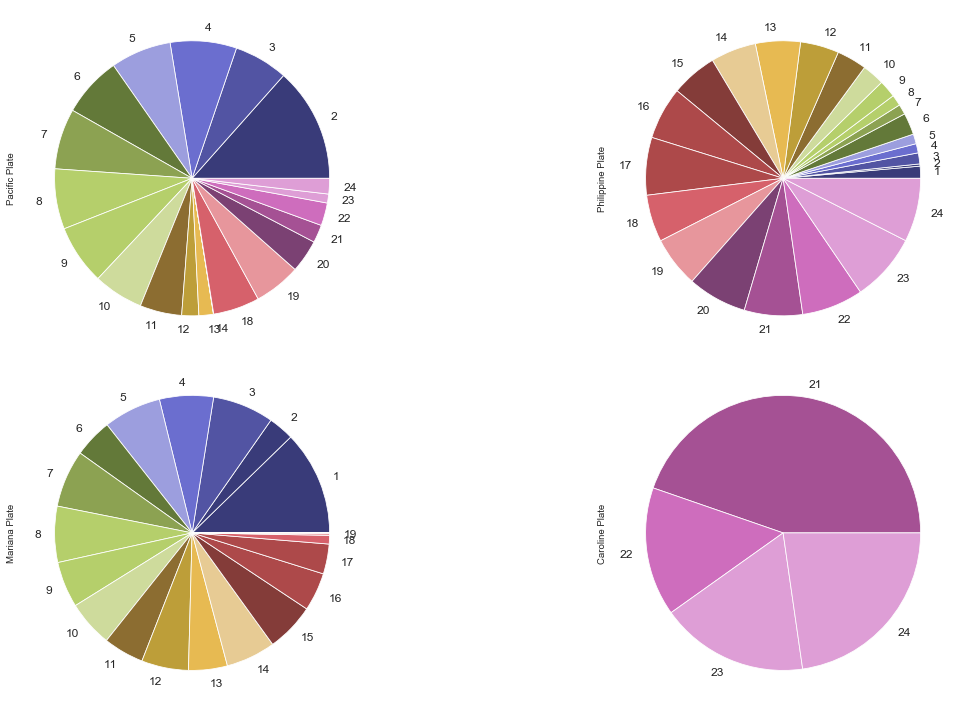

In [110]:
dff = pd.DataFrame({'Pacific Plate': df.plate_pacif,
                    'Philippine Plate': df.plate_phill,
                    'Mariana Plate': df.plate_maria,
                    'Caroline Plate': df.plate_carol},
                   index=df.profile).dropna()
dff.plot(kind='pie', subplots=True, figsize=(20, 10),
         legend=False, table=False,
         fontsize=12, sort_columns=True,
         layout=(2, 2), colormap='tab20b')
plt.tight_layout()

 Boxplot of every measurement

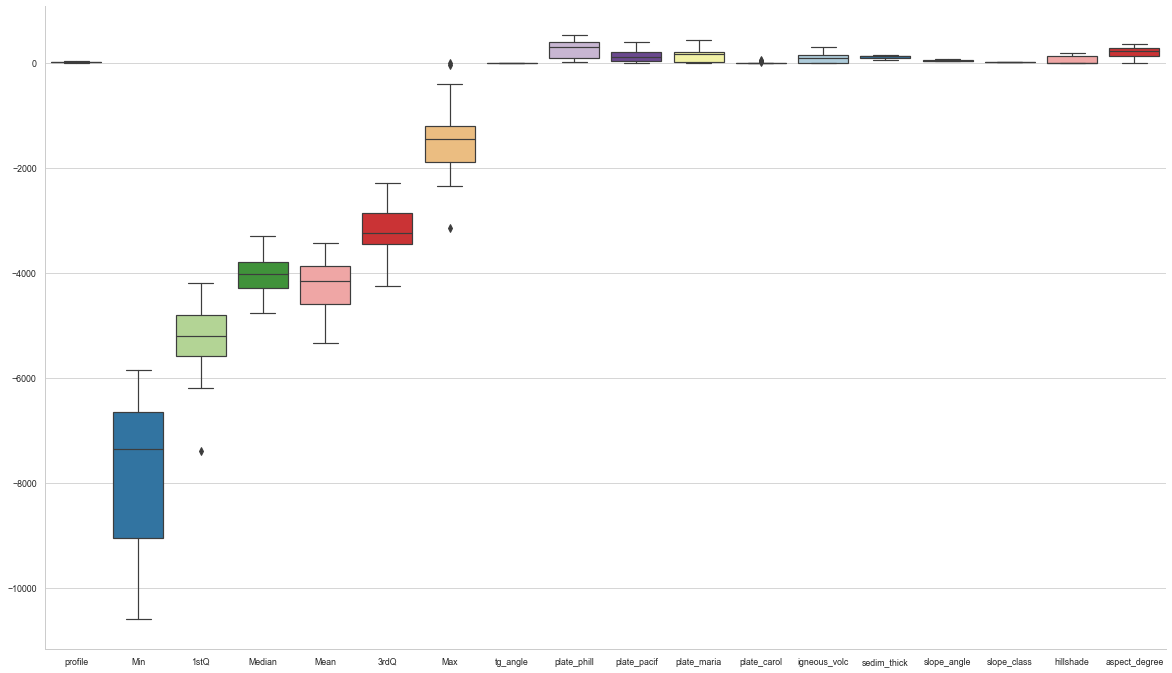

In [111]:
g = sns.catplot(data=df, kind="box", palette='Paired', orient="v",
                legend=True, legend_out=True, margin_titles=True)
g.fig.set_size_inches(20, 10)

Pearson

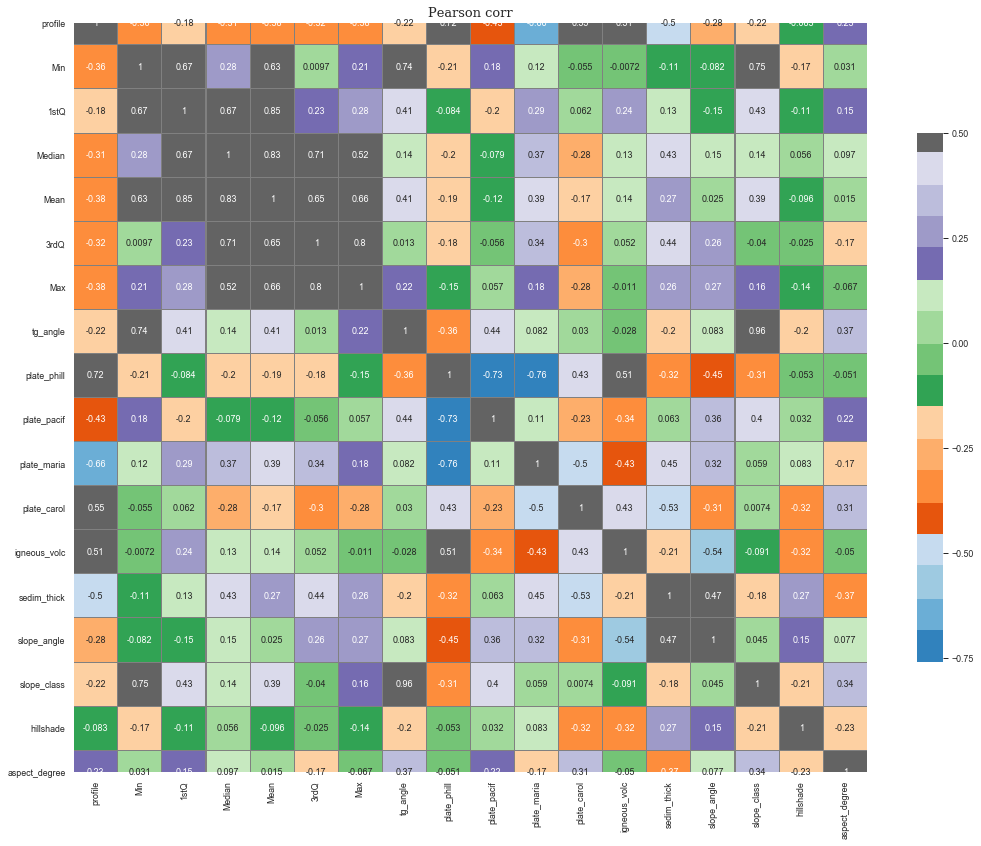

In [112]:
corr = df.corr(method='pearson')
cmap = sns.color_palette("tab20c")
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap=cmap, vmax=0.5, center=0, annot=True,
            annot_kws={"size": 9}, square=True, linewidths=.05, linecolor='grey',
            cbar=True, mask=False, cbar_kws={"shrink": .5})
plt.title('Pearson corr', fontsize=13, fontfamily='serif')
plt.tight_layout()

Spearman

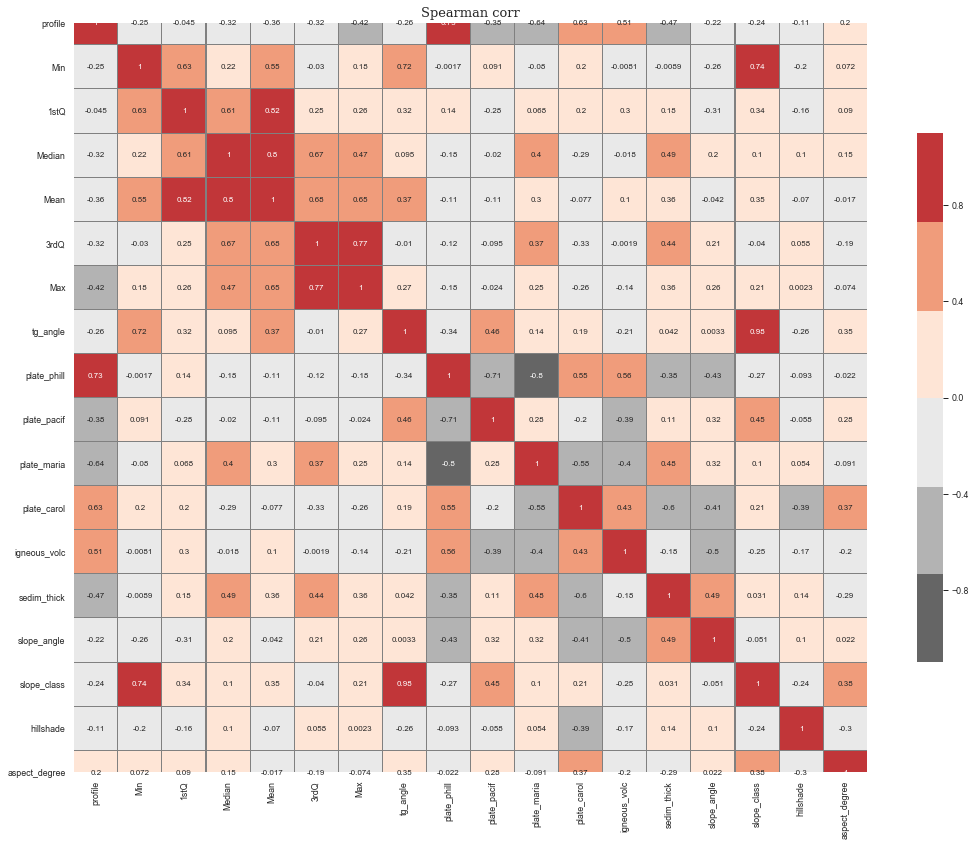

In [113]:
corr = df.corr(method='spearman')
cmap = sns.color_palette("RdGy_r")
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap=cmap, robust=False,
            vmin=-1.1, vmax=1.1, center=0,
            annot=True, annot_kws={"size": 8},
            square=True, linewidths=.05, linecolor='grey',
            cbar=True, mask=False, cbar_kws={"shrink": .5}
            )
plt.title('Spearman corr', fontsize=13, fontfamily='serif')
plt.tight_layout()

Comparison of profile thickness and volcanic  activity

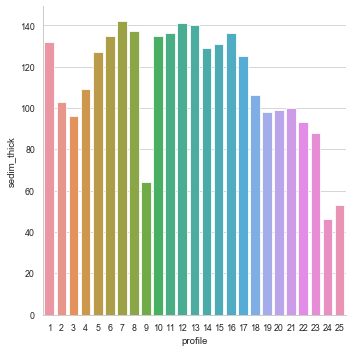

In [114]:
sns.catplot(x="profile", y="sedim_thick",
            data=df, kind="bar");

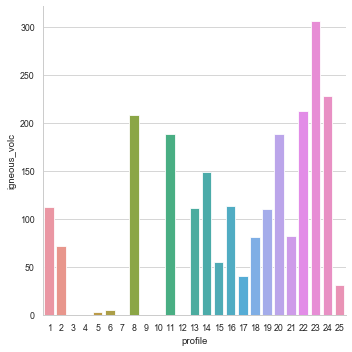

In [115]:
sns.catplot(x="profile", y="igneous_volc",
            data=df, kind="bar");

Regression

In [116]:
formula = 'profile ~ sedim_thick + igneous_volc + slope_angle'
res = smf.ols(formula, data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                profile   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     5.881
Date:                Fri, 22 May 2020   Prob (F-statistic):            0.00445
Time:                        14:46:38   Log-Likelihood:                -77.241
No. Observations:                  25   AIC:                             162.5
Df Residuals:                      21   BIC:                             167.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.9305      6.362      2.819      0.010       4.701      31.160
sedim_thick     -0.1320      0.048     -2.743      0.012      -0.232      -0.032
igneous_volc     0.0445      0.016      2.819      0.010       0.012       0.077
slope_angle      0.1328      0.115      1.151      0.263      -0.107       0.373
==============================================================================
Omnibus:                        1.669   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.095
Skew:                          -0.198   Prob(JB):                        0.578
Kurtosis:                       2.054   Cond. No.                         884.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

QQ graphs

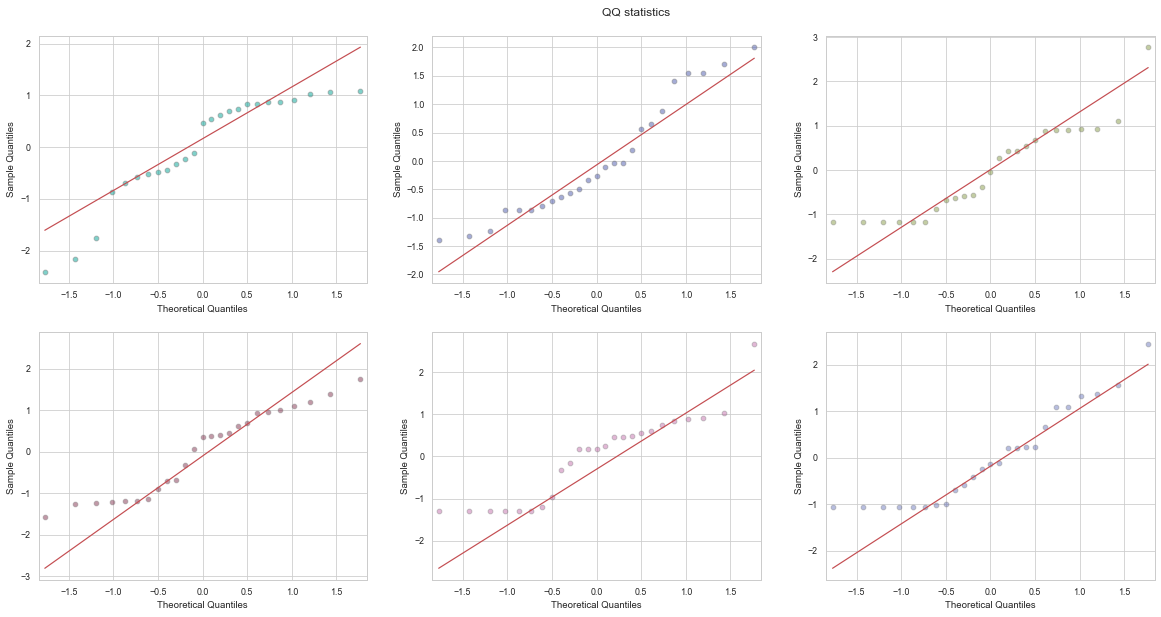

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(20.0, 10.0))
plt.suptitle('QQ statistics',
             x=0.54, y=.92)
fig = sga.qqplot(df.sedim_thick, line='q', fit=True,
                 linewidth=.5, alpha=.5,
                 markerfacecolor='#00a497', markeredgecolor='grey',ax=axes[0][0])

fig = sga.qqplot(df.slope_angle, line='q', fit=True, linewidth=.5,
                 alpha=.5, markerfacecolor='#4d5aaf', markeredgecolor='grey',ax=axes[0][1])

fig = sga.qqplot(df.plate_pacif, line='q', fit=True, linewidth=.5,
                 alpha=.4, markerfacecolor='#69821b', markeredgecolor='grey',ax=axes[0][2])

fig = sga.qqplot(df.plate_phill, line='q', fit=True, linewidth=.5,
                 alpha=.4, markerfacecolor='#640125', markeredgecolor='grey',ax=axes[1][0])
fig = sga.qqplot(df.plate_maria, line='q', fit=True, linewidth=.1,
                 alpha=.4, markerfacecolor='#b44c97', markeredgecolor='grey',ax=axes[1][1])

fig = sga.qqplot(df.igneous_volc, line='q', fit=True, lw=.1,
                 alpha=.4, markerfacecolor='#4d5aaf', markeredgecolor='grey',ax=axes[1][2])